In [24]:
import os 
from tqdm import tqdm
from PIL import Image

def extract_features(image_dir, output_file):
    feats = []
    files = sorted(os.listdir(image_dir))
    for fname in tqdm(files[:1000]):  # limit to 1000 images for demo
        path = os.path.join(image_dir, fname)
        img = Image.open(path).convert('RGB')
        feats.append(img)
    feats = np.array(feats)
    np.save(output_file, feats)
    print(f"✅ Saved {feats.shape} to {output_file}")


for i in range(1, 11):
    real_dir = "cifake/train/REAL/cat_" + str(i).zfill(2) 
    fake_dir = "cifake/train/FAKE/cat_" + str(i).zfill(2) 
    # Extract and save
    extract_features(real_dir, "real_features_no_process" + str(i).zfill(2) + ".npy")
    extract_features(fake_dir, "fake_features_no_process" + str(i).zfill(2) + ".npy")


100%|██████████| 1000/1000 [00:00<00:00, 4320.12it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 5462.59it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 5674.77it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 5523.54it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 5510.77it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 5533.12it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 5595.65it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 5463.28it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 5233.09it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 5612.50it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 5567.97it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 5563.69it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 5546.73it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 5480.36it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 5598.00it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 5695.76it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 5630.55it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 5673.93it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 5174.41it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process10.npy


100%|██████████| 1000/1000 [00:00<00:00, 5661.49it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process10.npy


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 2. Load Feature Vectors
# ==========================
# Load the features you previously extracted with ResNet18
m = 5

real_feats_list = np.array([np.load("real_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)])
fake_feats_list = np.array([np.load("fake_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)])

real_list = np.array([[item.flatten() for item in cat] for cat in real_feats_list]) # only if using unreduced
fake_list = np.array([[item.flatten() for item in cat] for cat in fake_feats_list])

real_feats = np.concatenate(real_list)
fake_feats = np.concatenate(fake_list)
print(real_feats.shape)

(5000, 3072)


In [44]:
U_real, S_real, V_real = np.linalg.svd(real_feats)
U_fake, S_fake, V_fake = np.linalg.svd(fake_feats)

In [52]:
tol = 10
# S_real[abs(S_real) < tol] = 0.0
# S_fake[abs(S_fake) < tol] = 0.0
print(np.linalg.matrix_rank(real_feats, tol=tol))
print(np.linalg.matrix_rank(fake_feats, tol=tol))

3065
3056


[]

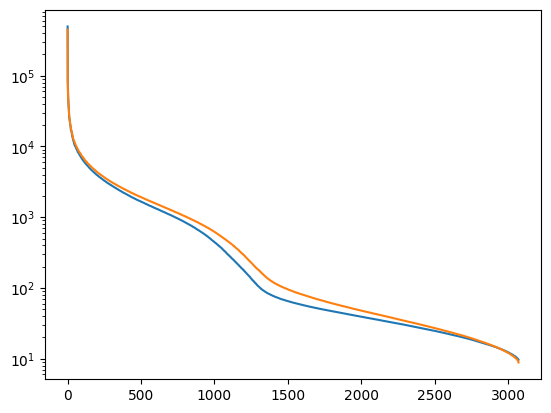

In [57]:
plt.plot(S_real)
plt.plot(S_fake)
plt.semilogy()